# Keras MLP Classifier

In [16]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [17]:
import numpy as np
labels = np.unique(train_labels)
labels, len(labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 46)

In [18]:
def decode_words(word_index, sentence):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return " ".join([reverse_word_index.get(i-3, "?") for i in sentence])

In [19]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [20]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.6503 - accuracy: 0.5289 - val_loss: 1.7330 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 28ms/step - loss: 1.4276 - accuracy: 0.6967 - val_loss: 1.2955 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0556 - accuracy: 0.7709 - val_loss: 1.1189 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8258 - accuracy: 0.8269 - val_loss: 1.0302 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6524 - accuracy: 0.8667 - val_loss: 0.9846 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.5225 - accuracy: 0.8936 - val_loss: 0.9542 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 0.4219 - accuracy: 0.9131 - val_loss: 0.9065 - val_accuracy: 0.8040
Epoch 8/20
16

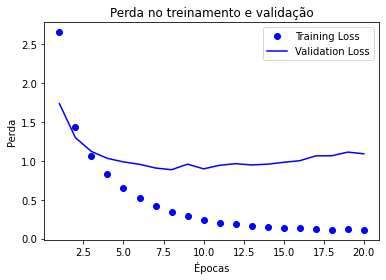

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Perda no treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()

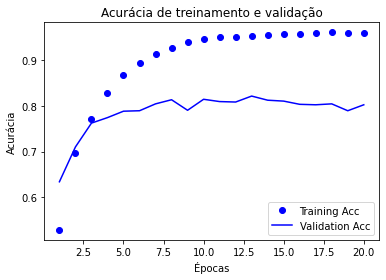

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training Acc")
plt.plot(epochs, val_loss_values, "b", label="Validation Acc")
plt.title("Acurácia de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=6,
                   batch_size=128,
                   validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/6
63/63 [==============================] - 2s 19ms/step - loss: 2.5110 - accuracy: 0.4548 - val_loss: 1.6518 - val_accuracy: 0.6260
Epoch 2/6
63/63 [==============================] - 1s 17ms/step - loss: 1.3798 - accuracy: 0.6814 - val_loss: 1.3079 - val_accuracy: 0.7000
Epoch 3/6
63/63 [==============================] - 1s 17ms/step - loss: 1.0641 - accuracy: 0.7523 - val_loss: 1.1976 - val_accuracy: 0.7340
Epoch 4/6
63/63 [==============================] - 1s 17ms/step - loss: 0.8686 - accuracy: 0.7886 - val_loss: 1.1292 - val_accuracy: 0.7500
Epoch 5/6
63/63 [==============================] - 1s 16ms/step - loss: 0.7195 - accuracy: 0.8188 - val_loss: 1.0973 - val_accuracy: 0.7540
Epoch 6/6
71/71 [==============================] - 0s 3ms/step - loss: 1.1755 - accuracy: 0.7409


[1.1755121946334839, 0.7408726811408997]